# Pytesseract 를 이용한 OCR

## OCR

optical character recognition (광학식 문자 인식)의 약자입니다. 간단한 예로는 수능 시험의 채점 방식이 있습니다.

우리나라에서의 OCR은 1989년도 우체국에서 처음 도입했을 만큼 오래된 기술입니다.

## Pytesseract



Pytesseract는 tesseract의 파이썬 wrapper입니다. (원본 C++ 구현체)

tesseract는 굉장히 오래된 OCR 오픈소스입니다. 2005년 휴렛페커드에 의해서 오픈소스가 공개되었고, 2006년부터는 구글이 개발하고 있습니다.

# Py Image Search OCR 코드

opencv로 이미지를 불러와서 tesseract에 넣어주기만 하는 간단한 코드입니다.

pytesseract 는 tesseract 의 warpper에 불과하므로, tesseract-ocr의 별도 설치가 필요합니다. 아래 코드와 같이 입력해서 colab 환경에서 사용하도록 설치를 진행합니다.

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

from google.colab import files
uploaded = files.upload()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 35 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,641 kB/s)
debconf: unable to initi

Saving apple_support.png to apple_support.png


py-image-search 에서 제공한 py 파일은 2가지 매개변수를 받는 구조입니다.

최소 신뢰도와 이미지 파일 경로입니다. 둘 다 따로 선언해줍니다.


In [ ]:
# USAGE
# python localize_text_tesseract.py --image apple_support.png
# python localize_text_tesseract.py --image apple_support.png --min-conf 50

# import the necessary packages
from pytesseract import Output
import pytesseract
# import argparse
import cv2

image_name = "apple_support.png"
min_conf = 0

이미지를 불러오고, 컬러를 BGR에서 RGB 코드로 바꿔줍니다.

그리고 이미지를 tesseract에 던지고 답을 받아옵니다.

그리고 pytesseract가 제공하는 Output 클래스는 단순히 스트링 4개를 필드로 가진 데이터 클래스입니다. Output.DICT 대신 'dict'를 써도 됩니다.

In [ ]:
# load the input image, convert it from BGR to RGB channel ordering,
# and use Tesseract to localize each area of text in the input image
image = cv2.imread(image_name)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = pytesseract.image_to_data(rgb, output_type=Output.DICT)

원본 이미지에 결과를 덧씌우는 코드입니다.

검출한 텍스트에 대해 루프를 돌며, 위치 정보에 박스를 씌우고 실제 인식한 글자를 씁니다.

이 예제에서는 최소 신뢰도가 0이므로, 글자가 아닌것도 글자로 잡은 경우가 포함됩니다.

In [ ]:
# loop over each of the individual text localizations
for i in range(0, len(results["text"])):
	# extract the bounding box coordinates of the text region from
	# the current result
	x = results["left"][i]
	y = results["top"][i]
	w = results["width"][i]
	h = results["height"][i]

	# extract the OCR text itself along with the confidence of the
	# text localization
	text = results["text"][i]
	conf = int(results["conf"][i])

	# filter out weak confidence text localizations
	if conf > min_conf:
		# display the confidence and text to our terminal
		print("Confidence: {}".format(conf))
		print("Text: {}".format(text))
		print("")

		# strip out non-ASCII text so we can draw the text on the image
		# using OpenCV, then draw a bounding box around the text along
		# with the text itself
		text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
		cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 1) # 이미지, 좌표 2개, 선색, 선 두께
		cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
			1.2, (0, 0, 255), 3) # 이미지, 텍스트, 좌표, 폰트, 크기, 색상, 두께

Confidence: 26
Text: a

Confidence: 96
Text: Apple

Confidence: 96
Text: Support

Confidence: 96
Text: 1-800-275-2273



텍스트 보여주기입니다.

cv2.imshow 기능이 colab에 문제를 일으키므로, 공식적으로 대신하는 기능인 cv2_imshow를 사용합니다.

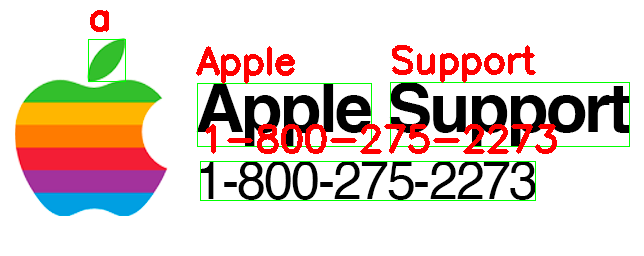

In [ ]:
# show the output image
from google.colab.patches import cv2_imshow
cv2_imshow(image)